In [1]:
import numpy as np
import pandas as pd
import re
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [66]:
df = pd.read_csv('herb_text_full.csv', lineterminator='\n')
df_text = df.copy()

In [78]:
def count_frequency(lst): 
    freq = {} 
    for item in lst: 
        if (item in freq): 
            freq[item] += 1
        else: 
            freq[item] = 1
    return freq

In [72]:
df_text = df.loc[:, ["origins", "properties", "medicinal_uses"]].dropna(axis = 0)

In [75]:
df_text.sample(10)

,origins,properties,medicinal_uses
252,", , ,European,North America",Cordial Demulcent Diaphoretic Hypotens...,"Anxiety, Cardiovascular, Colds, Herbal Te..."
209,Central and South America,Antioxidant Aphrodisiac Appetite Depress...,"Cholesterol, Cough, Diet/weight Loss, Ecz..."
73,Traditional Chinese Medicine,Antitussive Breath Depurative Phytoest...,"Addiction, Anxiety, Bronchitis, Candida/y..."
345,"North America,Traditional Chinese Medicine",Anodyne Antispasmodic Astringent Calm ...,"Alcoholism, Anxiety, Chinese, Headache/Mi..."
239,"Ayurvedic,Traditional Chinese Medicine",Abortifacient Antiscorbutic Astringent ...,"Ayurvedic, Chinese, Diabetes, Herpes/Cold..."
44,"Australia,Southeast Asia",Analgesic Antibacterial Antifungal Ant...,"Acne , Aromatherapy, Athletes Foot/Ringwor..."
248,Wikipedia,Appetite Depressant Depurative Hypoglycemic,"Diabetes, Diet/weight Loss"
197,", , ,African,Middle East,Tropical islands",Analgesic Anodyne Antirheumatic Antisc...,"African, Arthritis, Bruises/sprains, Cons..."
206,North America,Antispasmodic Anxiety Muscle Relaxant ...,"Anxiety, Sleep/Insomnia"
146,"North America,United Plant Savers",Anti-inflammatory Antibacterial AntiVira...,"Candida/yeast, Colds, Ear, Immune, Insec..."


In [132]:
# make everything into list
#lst_origin = df_text.origins.to_list()
#lst_props = df_text.properties.str.strip()
def make_list_prop(df_name_and_col):
    
    new_lst = df_name_and_col.str.split(' ')
    new_lst = [el.strip() for lst in new_lst for el in lst]
    #lst_set = set([el.strip() for lst in new_lst for el in lst])
    return new_lst


In [145]:
def make_list_med(df_name_and_col):
    
    new_lst = df_name_and_col.str.split(',')
    new_lst = [el.strip() for lst in new_lst for el in lst]
    #lst_set = set([el.strip() for lst in new_lst for el in lst])
    return new_lst

In [71]:
#lst_tags.str.split(' ')
#set([el for lst in lst_tags for el in lst])

{'',
 '(allergies)',
 '(bph)',
 '(but',
 '(dysmenorrhea)',
 '(uti)',
 '2',
 'a',
 'abdominal',
 'abrasions',
 'abscesses',
 'abuse',
 'ache',
 'aches',
 'acne',
 'addiction',
 'adults',
 'african',
 'aged',
 'agents',
 'aging',
 'aid',
 'ailments',
 'alcohol',
 'alcoholic',
 'alcoholism',
 'all',
 'allergies',
 'allergy',
 'alopecia',
 'alzhemimers',
 'amenorrhea',
 'american',
 'amount',
 'and',
 'animal',
 'animals',
 'anti',
 'antiarthritic',
 'anticancer',
 'antirheumatic',
 'ants',
 'anxiety',
 'anxious',
 'aphrodisiac',
 'aromatherapy',
 'arteriosclerosis',
 'arthritic',
 'arthritis',
 'arts',
 'as',
 'asthma',
 "athlete's",
 'athletes',
 'ayurvedic',
 'back',
 'bad',
 'balances',
 'balancing',
 'baldness',
 'balms',
 'base',
 'beauty',
 'bed',
 'benefits',
 'benign',
 'best',
 'birthing',
 'bites',
 'bitter',
 'bladder',
 'bleeding',
 'blends',
 'bloating',
 'blood',
 'body',
 'boils',
 'bone',
 'boost',
 'boosters',
 'botanical',
 'bowel',
 'brain',
 'breakouts',
 'breast',
 'b

In [87]:
lst_med = df_text.medicinal_uses.str.split(',')

In [94]:
lst_med = [el.strip() for lst in lst_med for el in lst]

In [97]:
lst_props = [el.strip() for lst in lst_props for el in lst]

In [20]:
#lst_med = [el for lst in lst_med for el in lst]
#lst_origin = [el for lst in lst_origin for el in lst]

In [30]:
lst_origin = df_text.origins.str.split(',')

In [96]:
lst_origin = [el for lst in lst_origin for el in lst]

In [76]:
origin_unique = ['Southeast Asia', 'Tropical islands', 'North America', 'European', 'Middle East',\
                 'Central and South America', 'Chinese', 'African', 'Ayurvedic', 'Australia']

In [95]:
count_frequency(lst_med)

{'Arthritis': 15,
 'Cholesterol': 16,
 'Culinary/Kitchen': 51,
 'Massage Oils': 9,
 'North American': 2,
 'Nutrition': 27,
 'Skin Care': 22,
 'Constipation': 8,
 'Parasites/worms': 16,
 'Amenorrhea': 10,
 'Aphrodisiac': 16,
 'Bruises/sprains': 10,
 'Cancer Prevention': 19,
 'Chinese': 35,
 'Dysmenorrhea': 14,
 'Female Hormones': 12,
 'Immune': 21,
 'Liver': 20,
 'Longevity Tonics': 33,
 'Menopause': 13,
 'Menorrhagia': 10,
 'Nerve/Back Pain': 14,
 'PMS': 7,
 'Allergies': 9,
 'Congestion': 27,
 'Eyes/Vision': 14,
 'Sinus': 8,
 'Acne': 10,
 'Eczema': 21,
 'Cardiovascular': 30,
 'Hypertension': 25,
 'Stress': 12,
 'Aromatherapy': 37,
 'Bladder Infection (UTI)': 8,
 'Cellulite': 8,
 'Colds': 34,
 'Detoxification': 6,
 'Facial Care': 19,
 'Gout': 11,
 'Herbal Steam': 12,
 'Rheumatoid_arthritis': 26,
 'Burns': 20,
 'Hair': 11,
 'Polynesian': 6,
 'Psoriasis': 20,
 'South_American': 24,
 'Diabetes': 16,
 'Diet/weight Loss': 18,
 'Nausea': 12,
 'Cough': 18,
 'Sleep/Insomnia': 20,
 'Diarrhea': 1

In [121]:
df_north_america = df_text[df_text.origins.str.contains('North America')]
df_south_america = df_text[df_text.origins.str.contains('South America')]
df_china = df_text[df_text.origins.str.contains('Chinese')]
df_africa = df_text[df_text.origins.str.contains('Africa')]
df_middle_east = df_text[df_text.origins.str.contains('Middle')]
df_hindu = df_text[df_text.origins.str.contains('Ayurvedic')]
df_islands = df_text[df_text.origins.str.contains('islands') | df_text.origins.str.contains('Australia')]
df_southeast_asia  = df_text[df_text.origins.str.contains('Southeast Asia')]

In [142]:


# north_america_dict = count_frequency(make_list_prop(df_north_america.properties))
# south_america_dict = count_frequency(make_list_prop(df_south_america.properties))
# china_dict = count_frequency(make_list_prop(df_china.properties))
# africa_dict = count_frequency(make_list_prop(df_africa.properties))
# middle_east_dict = count_frequency(make_list_prop(df_middle_east.properties))
# hindu_dict = count_frequency(make_list_prop(df_hindu.properties))
# islands_dict = count_frequency(make_list_prop(df_islands.properties))
# southeast_asia_dict = count_frequency(make_list_prop(df_southeast_asia.properties))


In [143]:
north_america_df = pd.DataFrame.from_dict((north_america_dict),orient = 'index', columns= ["frequency"]).sort_values(by='frequency')

In [149]:
#count_frequency(make_list_med(df_north_america.medicinal_uses))

In [266]:
north_america_dict_med = count_frequency(make_list_med(df_north_america.medicinal_uses))
south_america_dict_med = count_frequency(make_list_med(df_south_america.medicinal_uses))
china_dict_med = count_frequency(make_list_med(df_china.medicinal_uses))
africa_dict_med = count_frequency(make_list_med(df_africa.medicinal_uses))
middle_east_dict_med = count_frequency(make_list_med(df_middle_east.medicinal_uses))
hindu_dict_med = count_frequency(make_list_med(df_hindu.medicinal_uses))
islands_dict_med = count_frequency(make_list_med(df_islands.medicinal_uses))
southeast_asia_dict_med = count_frequency(make_list_med(df_southeast_asia.medicinal_uses))

In [267]:
del south_america_dict_med['South_American']
del china_dict_med['Chinese']
del africa_dict_med['African']
del china_dict_med['Culinary/Kitchen']
del middle_east_dict_med['Culinary/Kitchen']
del middle_east_dict_med['Ayurvedic']
del north_america_dict_med['Herbal Teas']
del china_dict_med['Herbal Teas']
del hindu_dict_med['Ayurvedic']
del hindu_dict_med['Culinary/Kitchen']

In [268]:
middle_east_dict_med

{'Cough': 2,
 'Sleep/Insomnia': 1,
 'Burns': 2,
 'Cancer Prevention': 4,
 'Cardiovascular': 3,
 'Diarrhea': 1,
 'Diet/weight Loss': 1,
 'Facial Care': 3,
 'Immune': 1,
 'Menorrhagia': 1,
 'Nutrition': 6,
 'Parasites/worms': 3,
 'Prostate': 1,
 'Psoriasis': 2,
 'Skin Care': 5,
 'Wrinkles': 1,
 'Anxiety': 1,
 'Cholesterol': 6,
 'Eczema': 1,
 'Fatigue': 1,
 'Herbal Teas': 3,
 'Libido': 1,
 'Pet': 2,
 'Stop Smoking': 2,
 'Stress': 1,
 'Sunburns': 1,
 'Congestion': 1,
 'Constipation': 2,
 'Massage Oils': 6,
 'African': 3,
 'Aromatherapy': 4,
 'Athletes Foot/Ringworm': 2,
 'Ayurvedic': 7,
 'Candida/yeast': 4,
 'Christmas': 2,
 'Colds': 2,
 'Cuts & Wounds': 4,
 'Dental/Oral Care': 1,
 'Sore Throat': 3,
 'Eyes/Vision': 1,
 'Fibromyalgia': 2,
 'Varicose Veins': 1,
 'Allergies': 1,
 'Asthma': 1,
 'Bronchitis': 5,
 'Diabetes': 2,
 'Ear': 1,
 'Flu': 1,
 'Herpes/Cold Sores': 1,
 'Insect Repellent': 3,
 'Sinus': 1,
 'Spring Tonics': 2,
 'Children': 2,
 'Digestion': 6,
 'Halitosis': 2,
 'IBS': 2,
 'A

In [269]:
north_america_df = pd.DataFrame.from_dict((north_america_dict_med),orient = 'index', columns= ["frequency"]).sort_values(by='frequency', ascending = False)
south_america_df = pd.DataFrame.from_dict((south_america_dict_med),orient = 'index', columns= ["frequency"]).sort_values(by='frequency', ascending = False)
china_df = pd.DataFrame.from_dict((china_dict_med),orient = 'index', columns= ["frequency"]).sort_values(by='frequency', ascending = False)
africa_df = pd.DataFrame.from_dict((africa_dict_med),orient = 'index', columns= ["frequency"]).sort_values(by='frequency', ascending = False)
middle_east_df = pd.DataFrame.from_dict((middle_east_dict_med),orient = 'index', columns= ["frequency"]).sort_values(by='frequency', ascending = False)
hindu_df = pd.DataFrame.from_dict((hindu_dict_med),orient = 'index', columns= ["frequency"]).sort_values(by='frequency', ascending = False)




In [243]:
north_america_df.T

,Sore Throat,Bronchitis,Colds,Congestion,Psoriasis,Cough,Eczema,Cuts & Wounds,Longevity Tonics,Parasites/worms,...,Cellulite,Diet/weight Loss,Libido,Hair,Memory/Focus,Stress,Digestion,Bruises/sprains,Ear,Fatigue
frequency,15,11,11,10,9,9,7,7,7,6,...,1,1,1,1,1,1,1,1,1,1


Text(0.5, 1.0, 'North America Popular Medicinal properties')

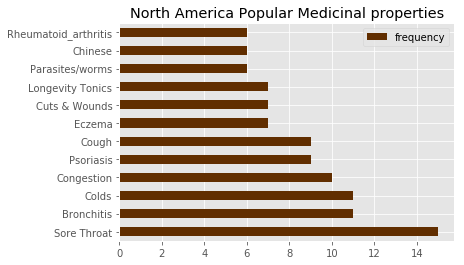

In [250]:
north_america_df.iloc[0:12,:].plot(kind = 'barh', color = '#612e00')
plt.title('North America Popular Medicinal properties')


Text(0.5, 1.0, 'South America Popular Medicinal properties')

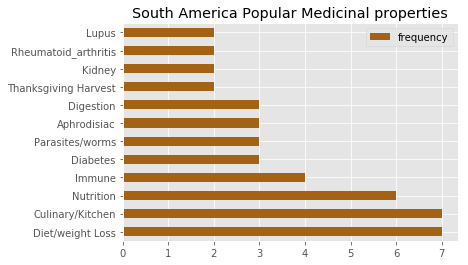

In [251]:
south_america_df.iloc[0:12,:].plot(kind = 'barh', color = "#a36214")
plt.title('South America Popular Medicinal properties')


Text(0.5, 1.0, 'China Popular Medicinal properties')

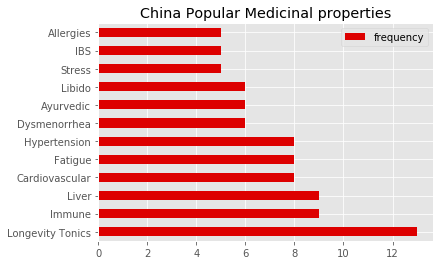

In [252]:
china_df.iloc[0:12,:].plot(kind = 'barh', color = "#dd0000")
plt.title('China Popular Medicinal properties')


Text(0.5, 1.0, 'Middle East Popular Medicinal properties')

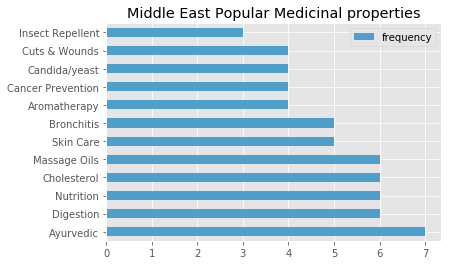

In [253]:
middle_east_df.iloc[0:12,:].plot(kind = 'barh', color = '#4d9fcc')
plt.title('Middle East Popular Medicinal properties')


Text(0.5, 1.0, 'Ayurvedic Popular Medicinal properties')

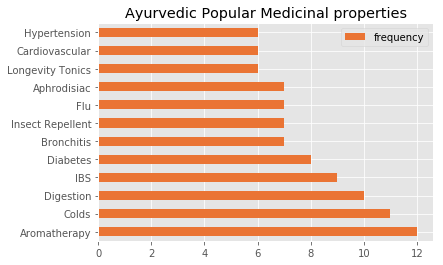

In [270]:
hindu_df.iloc[0:12,:].plot(kind = 'barh', color = '#ea7434')
plt.title('Ayurvedic Popular Medicinal properties')

### General Medicinal Properties

In [254]:
general_dict = count_frequency(make_list_med(df_text.medicinal_uses))
del general_dict['Chinese']
del general_dict['Culinary/Kitchen']
del general_dict['Ayurvedic']
del general_dict['Aromatherapy']
del general_dict['South_American']
del general_dict['Herbal Teas']

In [255]:
general_df = pd.DataFrame.from_dict((general_dict),orient = 'index', columns= ["frequency"]).sort_values(by='frequency', ascending = False)

Text(0.5, 1.0, 'Popular Medicinal properties')

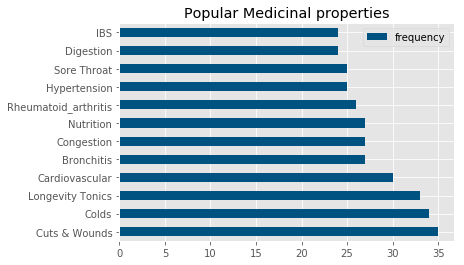

In [256]:
general_df.iloc[0:12,:].plot(kind = 'barh', color = '#005280')
plt.title('Popular Medicinal properties')
